## MNIST로 MLP 설계

In [1]:
''' 1. module import'''
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [2]:
''' 2. 딥러닝 모델을설계할 때 활용하는 장비 확인'''
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
    
print('Using PyTorch version:', torch.__version__, 'Device:', DEVICE)

Using PyTorch version: 1.4.0 Device: cuda


In [3]:
BATCH_SIZE = 32
EPOCHS = 10

''' 3. MNIST 데이터 다운로드(train, test set 분리)'''
train_dataset = datasets.MNIST(root = '../data/MNIST',
                              train=True,
                              download=True,
                              transform = transforms.ToTensor())
test_dataset = datasets.MNIST(root = '../data/MNIST',
                              train=False,
                              transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle=False)

In [18]:
for i in train_dataset:
    print(i)
    break

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [23]:
for i in train_loader:
    print(i)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [51]:
for i in test_loader:
    print(i)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [54]:
len(train_loader.dataset)

60000

In [4]:
''' 4. 데이터 확인(1)'''
for (x_train, y_train) in train_loader:
    print('x_train:', x_train.size(), 'type:', x_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

x_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


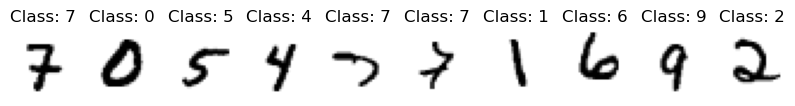

In [5]:
''' 5. 데이터 확인(2)'''
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(x_train[i,:,:,:].numpy().reshape(28,28), cmap='gray_r')
    plt.title('Class: ' + str(y_train[i].item()))

In [6]:
''' 6. MLP모델 설계'''
class Net(nn.Module): #nn.Module클래스를 상속받는 Net클래스 정의
    def __init__(self): #Net인스턴스 생성했을 때 지니게 되는 성질 정의
        super(Net, self).__init__() #nn.Module내에 있는 메스드 상속받아 이용
        self.fc1 = nn.Linear(28 * 28, 512) #첫번째 fully connected layer 정의
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        
        #Net클래스를 이용해 설계한 MLP모델의 forward propagation 정의
        #설계한 MLP모델에 데이터를 입력했을 때 output계산하기까지의 과정 나열
    def forward(self, x): 
        # MLP모델은 1차원의 벡터 값을 입력으로 받을 수 있다. 그러나 MNIST 이미지데이터는 2차원.
        # 2차원->1차원 => view메서드 이용해여 784크기의 1차원 데이터로 변환해 진행
        # 2차원의 데이터를 1차원으로 펼친다. flatten
        x = x.view(-1,28*28) #-1:차원축소
        
        # __init__의 첫번째 fully connected layer에 1차원으로 펼친 이미지 데이터 통과
        x = self.fc1(x)
        
        # 두번째 fully connected layer의 input으로 계산.
        x = F.sigmoid(x)
        
        # 두번째 fully connected layer에서 sigmoid함수를 이용해 계산 된 결괏값 통과
        x = self.fc2(x)
        
        # 세번째 fully connected layer의 input
        x = F.sigmoid(x)
        
        # 세번째 fully connected layer에서 sigmoid함수를 이용해 계산 된 결괏값 통과
        x = self.fc3(x)
        
        # 최종 output계산. 0~9까지 총 10가지 중 하나로 분류 => softmax를 이용해 확률 값 계산
        # softmax가 아닌 log_softmax 사용한 이유:역전파 진행할때 loss에 대한 gradient값을 원할하게 계산가능.
        # 로그함수의 기울기는 부드럽게 변화
        x = F.log_softmax(x, dim=1)
        
        # 최종 계산된 x값을 output으로 반환
        return x

In [7]:
''' 7. Optimizer, Object Function 설정'''
model = Net().to(DEVICE)
# 역전파를 이용해 파라미터를 업데이트 할 때 이용하는 optimizer를 정의
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [8]:
''' 8. MLP모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의'''
def train(model, train_loader, optimizer, log_interval):
    model.train()
    #trian_loader에는 학습에 이용되는 이미지 데이터와 레이블 데이터가 미니배치 단위로 묶여 저장되어있음.
    #train_loader내에 mini-batch단위로 저장된 데이터를 순서대로 이용해 MLP모형에 학습
    for batch_idx,(image, label) in enumerate(train_loader):
        #미니배치 내에 있는 이미지 데이터와 매칭된 레이블 데이터도 MLP모델을 학습시키기 위해 기존에 정의한 장비에 할당
        image = image.to(DEVICE)
        '''print(len(image)) : 32
        print(image)
        ([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], device='cuda:0')'''
        label = label.to(DEVICE)
        '''print(label)
        tensor([9, 7, 2, 5, 9, 3, 5, 5, 0, 3, 0, 0, 1, 3, 9, 9, 4, 0, 4, 1, 7, 6, 5, 4, 
        2, 2, 9, 1, 9, 6, 2, 6], device='cuda:0')'''
        
        # 과거에 이용한 미니배치 내에 있는 이미지데이터와 레이블데이터를 바탕으로 계산된 Loss의 Gradient값이 optimizer에 할당돼 있으므로 
        # optimizer의 gradient를 초기화
        optimizer.zero_grad()
        output = model(image)
        
        #계산된 output과 장비에 할당된 레이블 데이터를 기존에 정의한 cross entropy를 이용해 loss값 계산
        loss = criterion(output,label)
        
        #loss값을 계산한 결과를 바탕으로 역전파를 이용해 계산된 gradient값을 각 파라미터에 할당
        loss.backward()
        
        #각 파라미터에 할당된 gradient값을 이용해 파라미터값 업데이트
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{}({:.0f}%)]\tTrain Loss: {:.6f}".format(
            Epoch, batch_idx*len(image),
            len(train_loader.dataset), 100.*batch_idx/len(train_loader), loss.item()))

In [9]:
''' 9. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의'''
def evaluate(model, test_loader):
    #학습 과정 또는 학습이 완료된 MLP모델을 학습 상태가 아닌, 평가 상태로 지정
    model.eval()
    
    #test_loader내의 데이터를 이용해 loss값을 계산하기 위해 test_loss를 0으로 임시설정
    test_loss = 0
    
    #학습 과정 또는 학습이 완료된 MLP모델이 올바른 class로 분류한 경우를 세기 위해 correct=0으로 임시 설정
    correct = 0
    
    #모델 평가단계에서 gradient를 통해 파라미터 값이 업데이트 되는 현상을 방지하기 위해 torch.no_grad()메서드 이용해 gradient흐름 억제
    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            
            #기존에 정의한 crossentropy를 이용해 loss값을 계산한 결괏값을 test_loss에 더해 업데이트
            test_loss += criterion(output, label).item()
            
            #output값은 크기가 10인 벡터 값. 계산된 벡터 값 내 가장 큰 값인 위치에 대해 해당 위치에 대응하는 클래스로 예측했다고 판단.
            prediction = output.max(1, keepdim = True)[1]
            
            #모델이 최종으로 예측한 클래스의 값(prediction)과 실제 레이블(label)이 의미하는 클래스가 맞으면 correct에 더해 올바르게 예측한 횟수 저장
            correct += prediction.eq(label.view_as(prediction)).sum().item()
            
    #현재까지 계산된 test_loss값을 test_loader내에 존재하는 미니배치 개수만큼 나눠 평균 loss값으로 계산
    test_loss /= len(test_loader.dataset)
    
    #test_loader데이터 중 얼마나 맞췄는지를 계산해 정확도를 계산
    test_accuracy = 100. * correct / len(test_loader.dataset) #len(test_loader.dataset):10000
    return test_loss, test_accuracy

In [10]:
''' 10. MLP학습을 실행하면서 trian, test set의 loss 및 test set accuracy를 확인'''
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer, log_interval=200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH:{}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".format(
    Epoch, test_loss, test_accuracy))

C:\Users\leeej\anaconda3\envs\practice\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train Epoch: 1 [0/60000(0%)]	Train Loss: 2.280854
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 2.324965
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 2.340965
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 2.267328
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 2.256760
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 2.282448
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 2.244831
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 2.280669
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 2.206265
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 2.154536

[EPOCH:1], 	Test Loss: 0.0701, 	Test Accuracy: 18.87 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 2.315253
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 2.216213
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 2.170339
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 2.096596
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 1.949460
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 1.909739
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 1.902354
Train Epoch: 2 [4480

In [60]:
import sys
sys.version

'3.7.16 (default, Jan 17 2023, 16:06:28) [MSC v.1916 64 bit (AMD64)]'